<a href="https://colab.research.google.com/github/Madhushree-N-K/Madhushree-N-K/blob/main/model1_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('user uploaded files "{name}"with length{length} bytes'.format(name=fn,length=len(uploaded[fn])))

  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
user uploaded files "kaggle.json"with length73 bytes


In [ ]:
!kaggle datasets download -d kssanjaynithish03/retinal-fundus-images

Dataset URL: https://www.kaggle.com/datasets/kssanjaynithish03/retinal-fundus-images
License(s): CC-BY-NC-SA-4.0
 99% 2.29G/2.32G [00:18<00:00, 253MB/s]
100% 2.32G/2.32G [00:18<00:00, 137MB/s]


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
from zipfile import ZipFile
file_name = "/content/retinal-fundus-images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = r'../input/retinal-fundus-images/Retinal Fundus Images/train'
test_path = r'../input/retinal-fundus-images/Retinal Fundus Images/test'
val_path = r'../input/retinal-fundus-images/Retinal Fundus Images/val'

In [ ]:
base_model = tf.keras.applications.EfficientNetB4(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False, pooling='max')

71686520/71686520 [==============================] - 1s 0us/step


In [ ]:
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)
output=Dense(11, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(directory='/content/Retinal Fundus Images/train',
target_size = (224,224),
batch_size = 32,
class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(directory='/content/Retinal Fundus Images/test',
target_size = (224,224),
batch_size = 32,
class_mode = 'categorical')
val_set = test_datagen.flow_from_directory(directory='/content/Retinal Fundus Images/val',
target_size = (224,224),
batch_size = 32,
class_mode = 'categorical')

Found 20077 images belonging to 11 classes.
Found 1236 images belonging to 11 classes.
Found 433 images belonging to 11 classes.


In [ ]:
m = model.fit(
  training_set,
  validation_data=val_set,
  epochs=5,
  batch_size=128,
  steps_per_epoch=len(training_set),
   validation_steps=len(test_set),
  shuffle=False,
  initial_epoch=0
)

Epoch 1/5
628/628 [==============================] - ETA: 0s - loss: 5.8466 - accuracy: 0.6087

628/628 [==============================] - 544s 750ms/step - loss: 5.8466 - accuracy: 0.6087 - val_loss: 4.4081 - val_accuracy: 0.3372
Epoch 2/5
628/628 [==============================] - 466s 741ms/step - loss: 2.3186 - accuracy: 0.7554
Epoch 3/5
628/628 [==============================] - 459s 731ms/step - loss: 1.1973 - accuracy: 0.7930
Epoch 4/5
628/628 [==============================] - 461s 734ms/step - loss: 0.8243 - accuracy: 0.8199
Epoch 5/5
628/628 [==============================] - 462s 735ms/step - loss: 0.6817 - accuracy: 0.8366


In [ ]:
model.save('efficientnetb4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    errors=0
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)
            errors=errors + 1
        y_pred.append(pred_index)
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                split1=os.path.split(error_list[i])
                split2=os.path.split(split1[0])
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():
            count=error_indices.count(key)
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)
    y_pred=np.array(y_pred)
    print(y_true)
    print(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix
        cm = confusion_matrix(y_true, y_pred )
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [ ]:
import os
from sklearn.metrics import confusion_matrix, classification_report
length=len(test_set)
subject='eye disease'
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
working_dir = r'./'
print_code=10
preds=model.predict(test_set, steps=test_steps, verbose=1)
#print_info( test_set, preds, print_code, working_dir, subject )

1/1 [==============================] - 3s 3s/step


In [ ]:
model.predict(test_set)

39/39 [==============================] - 9s 240ms/step


array([[1.1758505e-03, 2.7650348e-03, 9.8951226e-01, ..., 1.1359596e-03,
        8.6693722e-04, 5.9663493e-04],
       [2.9214057e-03, 4.7310954e-03, 1.1801352e-02, ..., 1.6694035e-03,
        1.5140846e-03, 1.8230972e-03],
       [3.5034271e-03, 5.4633776e-03, 3.4825519e-02, ..., 1.9086617e-03,
        1.7052779e-03, 2.2010263e-03],
       ...,
       [1.0750451e-03, 2.4045892e-03, 9.8916793e-01, ..., 1.4408465e-03,
        9.4257388e-04, 6.0645037e-04],
       [3.0844016e-03, 4.1872258e-03, 7.8264093e-03, ..., 1.9575225e-03,
        2.2218516e-03, 1.7203097e-03],
       [7.9200242e-04, 1.9056440e-03, 9.9232328e-01, ..., 8.6281984e-04,
        6.2532391e-04, 4.1738403e-04]], dtype=float32)

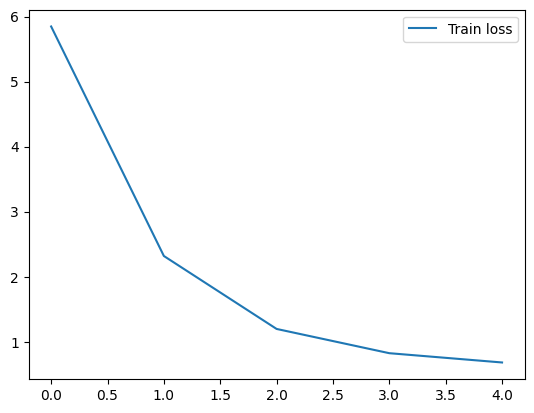

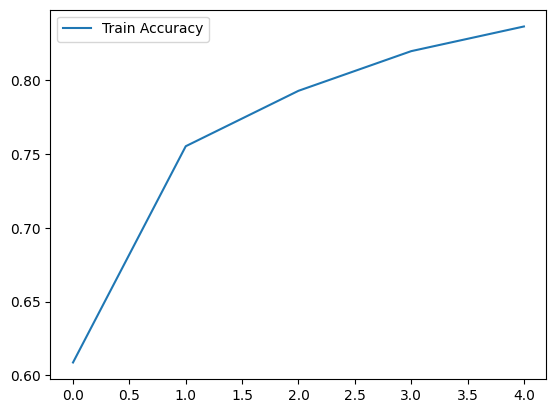

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(m.history['loss'], label='Train loss')

plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(m.history['accuracy'], label='Train Accuracy')

plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print("Test ACC: ", round(test_acc, 2))

NameError: name 'model' is not defined

In [ ]:
img = cv2.imread("/content/Retinal Fundus Images/train/3.Mild DR/10030_left.jpeg")
img= cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

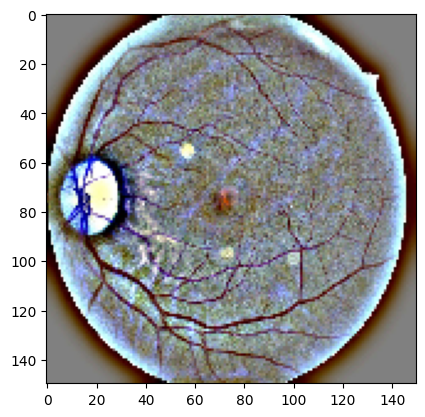

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image from file
img_path = "/content/Retinal Fundus Images/train/3.Mild DR/10030_left.jpeg"
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Display the image
plt.imshow(img_array.astype('uint8'))
plt.axis('on')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels
y_pred = np.argmax(model.predict(test_set), axis=-1)
y_true = np.argmax(training_set, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=labels))

NameError: name 'model' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming you want to save within your Drive
model.save('/content/efficientnetb4.h5')  # Update with your desired path


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'model' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input

from zipfile import ZipFile
file_name = "/content/retinal-fundus-images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

# Define a function to segment the image
def segment_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve thresholding
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply thresholding
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask to draw contours
    mask = np.zeros_like(image)

    # Draw contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Mask the image with the contours
    segmented = cv2.bitwise_and(image, mask)

    return segmented

# Define a function to preprocess a single image
def preprocess_image(image):
    image = cv2.resize(image, (150, 150))  # Resize to the size expected by the model
    image = img_to_array(image)  # Convert the image to a numpy array
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = preprocess_input(image)  # Preprocess the image for Inception V3
    return image

# Load the saved model
loaded_model = load_model('/content/drive/My Drive/my_model.h5')

# Path to the image
# Make sure this path points to a single image file, not a directory
image_path = '/content/Retinal Fundus Images/train/3.Mild DR/10030_left.jpeg'

# Read and segment the image
image = cv2.imread(image_path)

# Check if image was loaded successfully
if image is None:
    print("Error: Could not read image. Please check the file path.")
else:
    segmented_image = segment_image(image)

    # Display original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image')
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

    plt.show()

    # Preprocess the segmented image
    preprocessed_image = preprocess_image(segmented_image)

    # Make predictions
    images = np.vstack([preprocessed_image])
    prediction_array = loaded_model.predict(images, batch_size=10)[0]  # Get the actual prediction array

    # Define the classes
    classes = ["Dry AMD", "Normal Fundus", "Wet AMD", "Mild DR", "Moderate DR", "Severe DR", "Proliferate DR", "Hypertensive Retinopathy", "Pathological Myopia"]

    # Get results
    def get_results(classes, prediction_array):
        results = []
        for i, j in zip(classes, prediction_array):
            results.append([i, float(j)])  # Ensure j is a float
        results = sorted(results, key=lambda result: result[1], reverse=True)
        return results

    results = get_results(classes, prediction_array)

# Save results to CSV
header = ['Disease_Name', '%']
with open('results.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for result in results:
        writer.writerow(result)

# Read results from CSV and print
df = pd.read_csv('results.csv')
print(df)

# Plot the top 5 predictions
fig = plt.figure(figsize=(10, 5))
plt.bar([i[0] for i in results[:5]], [i[1] for i in results[:5]], color='green', width=0.4)
plt.xlabel("Diseases")
plt.ylabel("Prediction (%)")
plt.title("Predictions (Top 5)")
plt.xticks(rotation=45, ha='right')
plt.show()

Done


OSError: No file or directory found at /content/drive/My Drive/my_model.h5